<a href="https://colab.research.google.com/github/Gusta02/Analise_vendas_pyspark/blob/main/Analise_vendas_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalando o PySpark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=f5fbe04949da17e7b65d3c003d4e01e2a404302422642da08384c93dc80b1bfb
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [2]:
# Importando bibliotecas
from pyspark.sql import SparkSession

# Iniciando uma sessão PySpark
spark = SparkSession.builder.appName("Análise de Vendas").getOrCreate()

# Importando bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregando dados em um DataFrame
data_path = "/content/dados_vendas.csv"
sales_df = spark.read.csv(data_path, header=True, inferSchema=True)

In [4]:
# Exibindo informações sobre o DataFrame
sales_df.printSchema()

# Lidando com valores nulos (null)
sales_df = sales_df.dropna()

# Renomeando colunas para padronização (caso necessário)
sales_df = sales_df.withColumnRenamed("Product_ID", "product_id")

# Convertendo colunas de data para o formato apropriado (caso necessário)
from pyspark.sql.functions import to_date

sales_df = sales_df.withColumn("Date", to_date("Date", "yyyy-MM-dd"))


root
 |-- Date: date (nullable = true)
 |-- Product_ID: integer (nullable = true)
 |-- Amount_Sold: integer (nullable = true)



In [5]:
# Calculando o total de vendas por produto
product_sales = sales_df.groupBy("product_id").sum("Amount_Sold").withColumnRenamed("sum(Amount_Sold)", "total_sales")

# Exibindo os produtos mais vendidos
top_products = product_sales.orderBy(product_sales.total_sales.desc()).limit(5)
top_products.show()


+----------+-----------+
|product_id|total_sales|
+----------+-----------+
|      1003|       1200|
|      1001|        800|
|      1002|        790|
+----------+-----------+



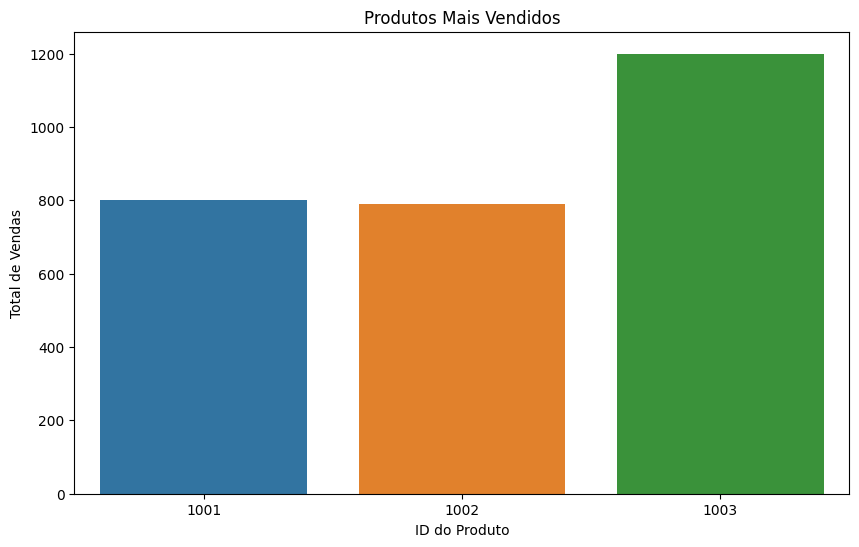

In [6]:
# Convertendo o DataFrame para um Pandas DataFrame para uso com o Seaborn
import pandas as pd

top_products_pd = top_products.toPandas()

# Criando um gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="product_id", y="total_sales", data=top_products_pd)
plt.title("Produtos Mais Vendidos")
plt.xlabel("ID do Produto")
plt.ylabel("Total de Vendas")
plt.show()
